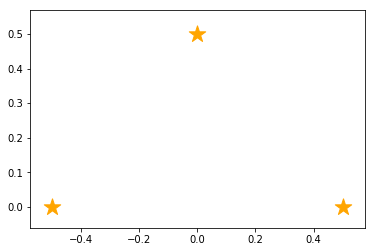

In [1]:
%matplotlib inline
import numpy as np
from copy import copy
import math, random
import matplotlib.pyplot as plt                   #   for plotting data
from matplotlib.patches import Ellipse      #  for drawing

actual_landmarks = [np.array([-0.5,0.0]),np.array([0.5,0.0]),np.array([0.0,0.5])]

def draw_landmarks(landmarks):
    xs = [ e[0] for e in actual_landmarks ]
    ys = [ e[1] for e in actual_landmarks ]
    
    plt.scatter(xs,ys,s=300,marker="*",label="landmarks",color="orange")
    
draw_landmarks(actual_landmarks)

In [2]:
actual_x = np.array([0.2,0.3,math.pi*200.0/180])   #ロボットの実際の姿勢

def draw_robot(pose):
    plt.quiver([pose[0]],[pose[1]],[math.cos(pose[2])],[math.sin(pose[2])],color="red",label="actual robot motion")

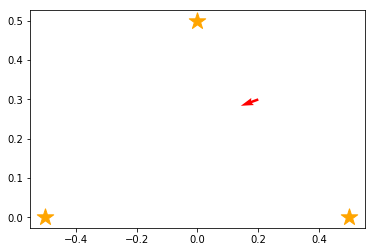

In [3]:
draw_robot(actual_x)
draw_landmarks(actual_landmarks)

In [4]:
def relative_landmark_pos(pose,landmark):
    x,y,theta = pose
    lx,ly = landmark
    
    distance = math.sqrt((lx - x)**2 + (ly - y)**2)
    direction = math.atan2(ly - y, lx - x) - theta
    
    return distance, direction, lx, ly

In [5]:
measurements = [ relative_landmark_pos(actual_x, ln) for ln in actual_landmarks ]

In [6]:
print(measurements)

[(0.7615773105863908, -6.2273593712933693, -0.5, 0.0), (0.4242640687119285, -4.2760566673861078, 0.5, 0.0), (0.28284271247461906, -1.1344640137963142, 0.0, 0.5)]


In [7]:
def draw_observation(pose, measurement):
    x,y,theta = pose
    mdistance, mdirection,tmp_x,tmp_y = measurement
    
    lx = x + mdistance * math.cos(theta + mdirection)
    ly = y + mdistance * math.sin(theta + mdirection)
    
    plt.plot([pose[0],  lx],[pose[1],  ly],color="pink")
    
def draw_observations(pose, measurements):
    for m in measurements:
        draw_observation(pose,m)

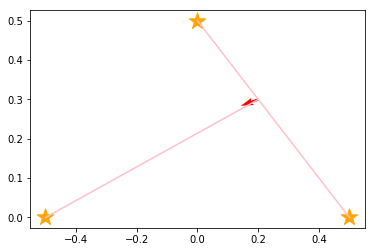

In [8]:
draw_robot(actual_x)
draw_landmarks(actual_landmarks)
draw_observations(actual_x, measurements)

In [30]:
def observation(pose, landmark):    
    adistance, adirection, alx, aly = relative_landmark_pos(pose,landmark)
    
    mdistance = random.gauss(adistance,adistance*0.1) 
    mdirection = random.gauss(adirection, 5.0/180.0 * math.pi)
    
    if math.cos(mdirection) < 0.0:
        return None
    
    return mdistance, mdirection, alx, aly

def observations(pose,landmarks):
    return filter(lambda x: x != None, [ observation(pose, e) for e in landmarks ])

In [31]:
measurements = observations(actual_x, actual_landmarks) 

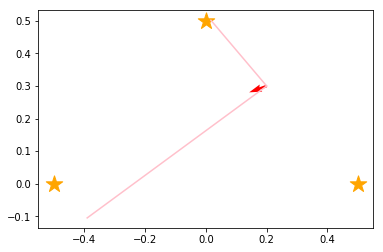

In [32]:
draw_robot(actual_x)
draw_landmarks(actual_landmarks)
draw_observations(actual_x, measurements)

In [33]:
### クラスや関数のコピペ ###

class Particle:
    def __init__(self,w):
        self.pose = np.array([0.0,0.0,0.0])
        self.weight = w
    
    def __repr__(self):
        return "pose: " + str(self.pose) + " weight: " + str(self.weight)
        

def f(x_old,u):
    pos_x, pos_y, pos_theta = x_old
    act_fw, act_rot = u
    
    act_fw = random.gauss(act_fw,act_fw/10)
    dir_error = random.gauss(0.0, math.pi / 180.0 * 3.0)
    act_rot = random.gauss(act_rot,act_rot/10)
    
    pos_x += act_fw * math.cos(pos_theta + dir_error)
    pos_y += act_fw * math.sin(pos_theta + dir_error)
    pos_theta += act_rot
    
    return np.array([pos_x,pos_y,pos_theta])

### 描画関数は少し変更を ###
def draw(pose,particles):    
    fig = plt.figure(i,figsize=(8, 8))
    sp = fig.add_subplot(111, aspect='equal')
    sp.set_xlim(-1.0,1.0)
    sp.set_ylim(-0.5,1.5)
    
    xs = [e.pose[0] for e in particles]
    ys = [e.pose[1] for e in particles]
    vxs = [math.cos(e.pose[2])*e.weight for e in particles]  #重みで長さを変えるようにしましょう
    vys = [math.sin(e.pose[2])*e.weight for e in particles]  #重みで長さを変えるようにしましょう
    plt.quiver(xs,ys,vxs,vys,color="blue",label="particles")
    
    plt.quiver([pose[0]],[pose[1]],[math.cos(pose[2])],[math.sin(pose[2])],color="red",label="actual robot motion")

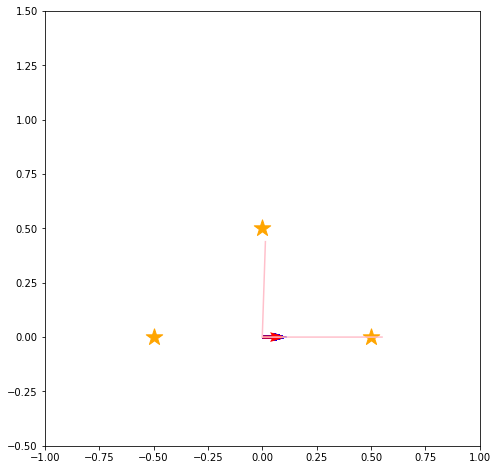

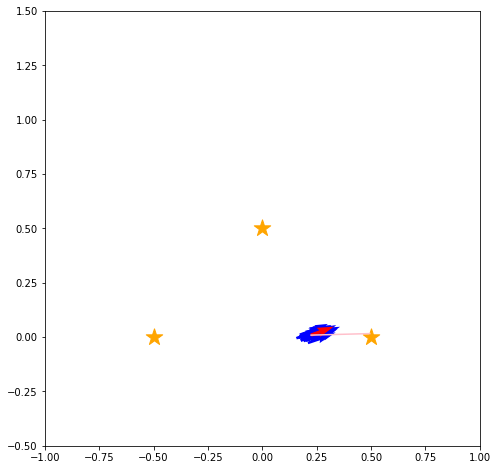

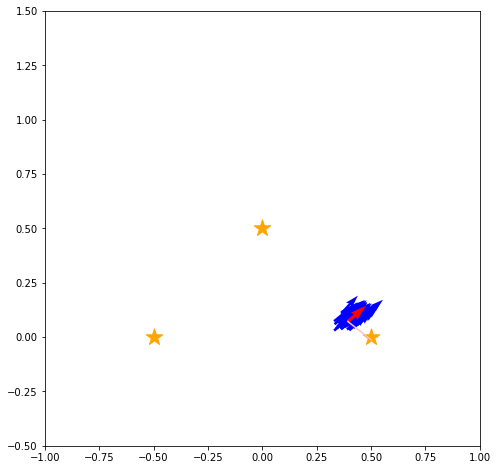

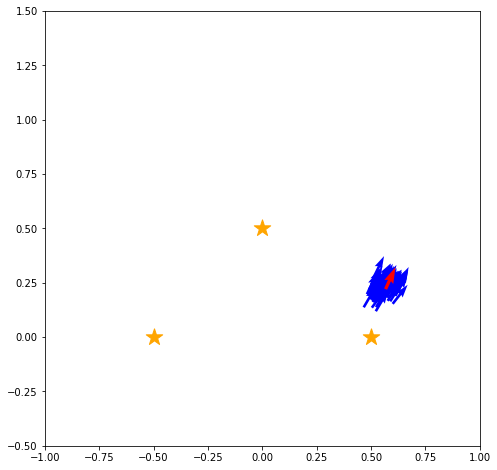

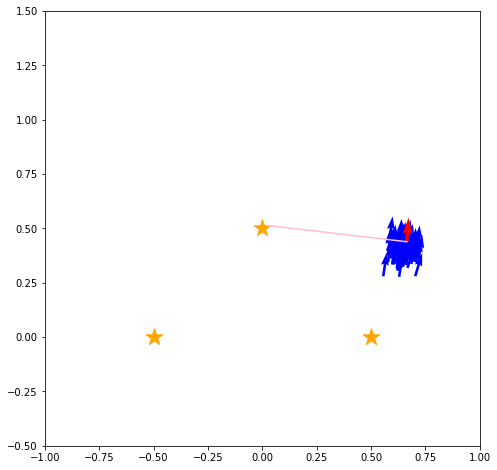

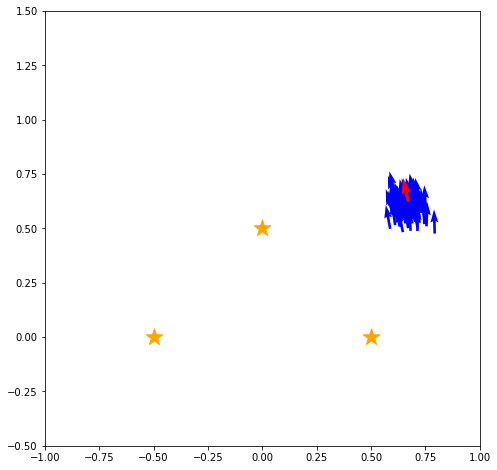

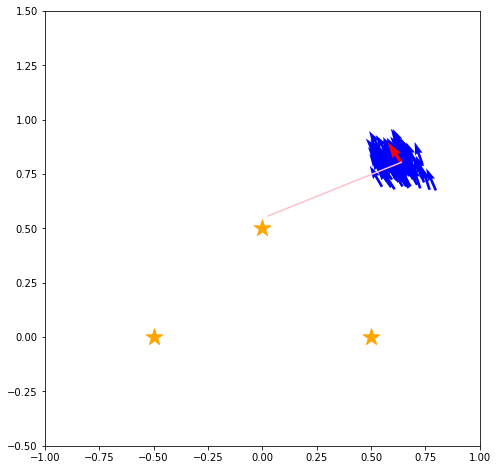

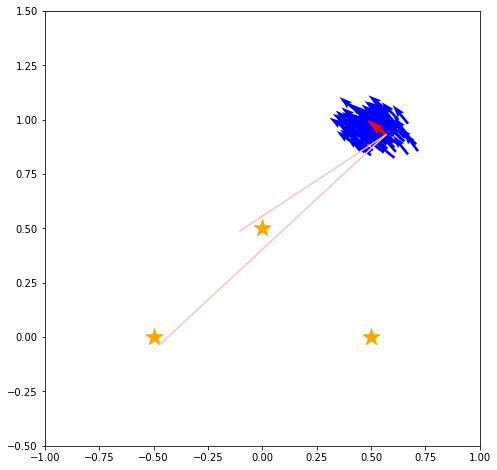

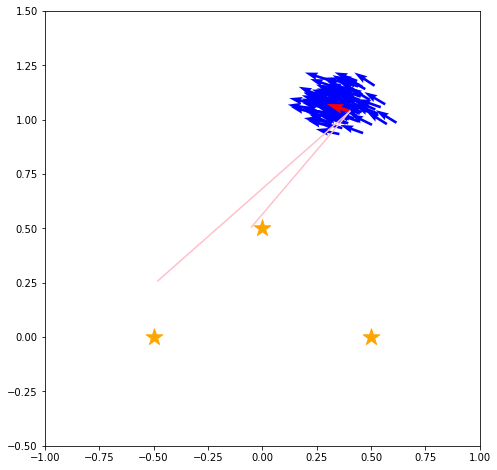

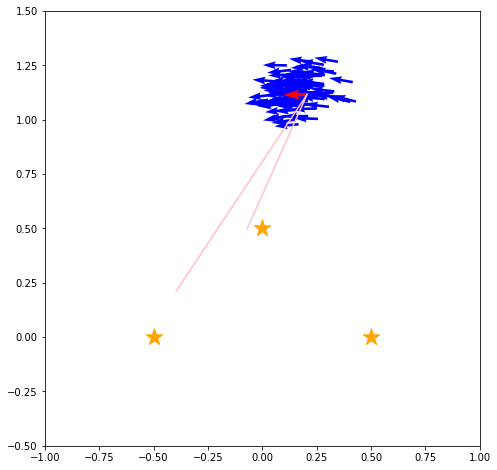

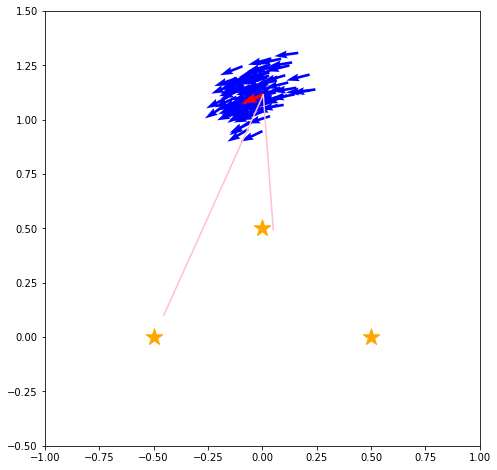

In [34]:
### 行動もコピペベースで。ランドマークの観測と描画を入れる ###

actual_x = np.array([0.0,0.0,0.0])   #ロボットの実際の姿勢
particles = [Particle(1.0/100) for i in range(100)]
u = np.array([0.2,math.pi / 180.0 * 20]) #ロボットの移動

import copy

path = [actual_x]
particle_path = [copy.deepcopy(particles)]
measurementss = [observations(actual_x, actual_landmarks)]
for i in range(10):
    actual_x = f(actual_x,u)
    path.append(actual_x)
    measurementss.append(observations(actual_x,actual_landmarks))

    for p in particles:
        p.pose = f(p.pose,u)
    particle_path.append(copy.deepcopy(particles))

for i,p in enumerate(path):
    draw(path[i],particle_path[i])
    draw_landmarks(actual_landmarks)
    draw_observations(path[i],measurementss[i])